# Lending Club Dataset Cleanup & EDA

The aim of this notebook is to cleanup and get the Lending Club loan dataset ready for predicitve analysis

### I) Setting Up

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# from regression_helper import currency_str_to_int, read_imdb_sql_table
sns.set_style("whitegrid")
%pylab inline

/Users/navina/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read csv file as a pandas df
loan_df = pd.read_csv('loan.csv')
#imdb_df.to_csv('.csv', sep='\t', encoding='utf-8')

### II)  EDA and missing record investigation

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(887379, 74)

In [5]:
loan_df = loan_df.replace(['n/a', 'N/A', 'NA', 'na'], np.nan)

In [6]:
# Checking for duplicate entries and missing values
dup_cnt, null_cnt = loan_df.duplicated().sum(), loan_df.isnull().sum().sum()
print("Number of Duplicate entries = %d, Missing entries = %d" % (dup_cnt, null_cnt))
if(loan_df.isnull().sum().sum()): print(loan_df.isnull().sum())

Number of Duplicate entries = 0, Missing entries = 17998494
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51466
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                         

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835913 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [8]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


### III) Clean Up and Convert Data Types of Variables

In [9]:
# Dropping columns with > 80% missing entries
loan_df = loan_df.dropna(thresh = len(loan_df)*0.2, axis = 1)
loan_df.shape

(887379, 55)

In [10]:
# dropping columns we are certain won't be needed for analysis
# id, member_id - no real predictive power
loan_df = loan_df.drop(['id', 'member_id'], axis = 1)

#### 1) Loan Amount and Funded Amount

In [11]:
# inspecting loan_amnt vs funded_amnt
print((loan_df['loan_amnt'] != loan_df['funded_amnt']).value_counts())

# since the number of people who were granted a different loan amount
# than requested is <1%, ignoring this difference and dropping funded_amnt
loan_df = loan_df.drop('funded_amnt', axis=1)

False    885317
True       2062
dtype: int64


#### 2) Term

In [12]:
loan_df['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [13]:
# creating dummies for term - 36 months: 1, 60 months:0
loan_df['term_encoded'] = loan_df['term'].replace([' 36 months',' 60 months'],[1,0])
loan_df = loan_df.drop('term', axis=1)

In [14]:
loan_df.iloc[:5, 7:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url
0,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....
1,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....
2,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....
3,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....
4,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....


#### 2) Employment Title

In [15]:
# Due to high cardinality, 'emp_title' won't be useful for analysis
# no grouping of similar professions is being done
print("The number of unique values in employment title: %d" % (loan_df['emp_title'].nunique()))
# Dropping this column since it won't help in the analysis
loan_df_clean = loan_df.drop('emp_title', axis=1)

The number of unique values in employment title: 299270


#### 3) Employment Length

In [16]:
# unique values
loan_df_clean['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [17]:
# Check for NAs
loan_df_clean['emp_length'].isnull().sum()
# Replace na with string 0, since emp_length is of object type
loan_df_clean['emp_length'] = loan_df_clean['emp_length'].fillna(value="0")
# Remove everything other than integers and convert to int
loan_df_clean['emp_length'] = loan_df_clean['emp_length'].replace(to_replace='\D+', value='', regex=True).astype(int)

#### 4) Home Ownership

In [18]:
print(loan_df_clean['home_ownership'].value_counts())
# remove ambiguous categories - other, none, any

# loan_df_bkup = loan_df_bkup[(loan_df_bkup.loan_status != 'OTHER') & (loan_df_bkup.loan_status != 'ANY') & (loan_df_bkup.loan_status != 'NONE')]
loan_df_clean['home_ownership'] = loan_df_clean['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], NaN)
loan_df_clean = loan_df_clean.dropna(subset=['home_ownership'])


MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64


#### 5) Verification Status

In [19]:
# unique values
# not sure of diff between Verified and Source Verified
# clubbing source verified and verified into one group
print(loan_df_clean['verification_status'].value_counts())
loan_df['verification_status'] = loan_df['verification_status'].replace('Source Verified', 'Verified')

Source Verified    329535
Verified           290976
Not Verified       266633
Name: verification_status, dtype: int64


#### 6) Issue Date

In [20]:
# Convert to datetime
loan_df_clean['issue_d'] = pd.to_datetime(loan_df_clean['issue_d'], format='%b-%Y')
# extract month and year creating separate features
loan_df_clean['issue_month'] = loan_df_clean['issue_d'].dt.month
loan_df_clean['issue_year'] = loan_df_clean['issue_d'].dt.year
# drop original issue_d column
loan_df_clean = loan_df_clean.drop('issue_d', axis=1)

#### 7) Loan Status

In [21]:
loan_df_clean['loan_status'].value_counts()

Current                                                601772
Fully Paid                                             207572
Charged Off                                             45214
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1957
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       749
Name: loan_status, dtype: int64

In [22]:
# merge 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
loan_df_clean['loan_status'] =  loan_df_clean['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
# merge 'Charged Off', 'Does not meet the credit policy. Status:Charged Off'
loan_df_clean['loan_status'] =  loan_df_clean['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')

#### Examing third set of columns

In [23]:
loan_df_clean.iloc[:5, 28:46]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq
0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0
1,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0
2,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0
3,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0
4,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0


In [24]:
loan_df_clean['pymnt_plan'].value_counts()

n    887134
y        10
Name: pymnt_plan, dtype: int64

In [25]:
# drop payment plan since almost all rows have 'n'
# drop url, title, desc since these aren't useful for analysis
# title, desc - borrower written free text
loan_df_clean = loan_df_clean.drop(['pymnt_plan', 'url', 'title','zip_code'], axis=1)


In [26]:
# drop columns since most values are NA
loan_df_clean['mths_since_last_delinq'].isnull().value_counts()
loan_df_clean = loan_df_clean.drop('mths_since_last_delinq', axis=1)

In [27]:
loan_df_clean['open_acc'].isnull().value_counts()

False    887119
True         25
Name: open_acc, dtype: int64

In [28]:
loan_df_clean['pub_rec'].isnull().value_counts()

False    887119
True         25
Name: pub_rec, dtype: int64

In [29]:
# since pub_rec and open rec could be important features, removing NA rows
loan_df_clean = loan_df_clean.dropna(subset=['open_acc','pub_rec', 'revol_util','collections_12_mths_ex_med'])

In [30]:
loan_df_clean.shape

(886537, 47)

In [31]:
# drop outstanding principal funded by investors,
# since >95% rows have the same values in both cols
(loan_df_clean.out_prncp_inv == loan_df_clean.out_prncp).value_counts()
loan_df_clean = loan_df_clean.drop('out_prncp_inv', axis=1)

In [32]:
print(loan_df_clean.next_pymnt_d.isnull().value_counts())

print(loan_df_clean.mths_since_last_major_derog.isnull().value_counts())

print(loan_df_clean.policy_code.value_counts())

# drop last_pymnt_d,next_pymnt_d, mths_since_last_major_derog since there are too many NAs
# drop policy_code since all values are the same
loan_df_clean = loan_df_clean.drop(['last_pymnt_d','next_pymnt_d', 'mths_since_last_major_derog', 'policy_code'], axis=1)


False    634002
True     252535
Name: next_pymnt_d, dtype: int64
True     665013
False    221524
Name: mths_since_last_major_derog, dtype: int64
1.0    886537
Name: policy_code, dtype: int64


In [33]:
# drop acc_now_delinq since delinquency is captured more accurately in other columns 
loan_df_clean.acc_now_delinq.value_counts()
loan_df_clean = loan_df_clean.drop(['acc_now_delinq','last_credit_pull_d'], axis=1)

In [34]:
# removing na rows from tot_coll_amt and tot_cur_bal
loan_df_clean = loan_df_clean.dropna(subset=['tot_coll_amt','tot_cur_bal'])

#### Feature Engineering

In [35]:
# Encode new column (dependent variable) based on loan status
# bad - Default, Charged Off 
# good - Fully Paid
# remove - Late (16-30 days),Late (31-120 days), Current,In Grace Period
loan_df_clean = loan_df_clean[(loan_df_clean.loan_status == 'Fully Paid') | (loan_df_clean.loan_status == 'Charged Off') | (loan_df_clean.loan_status == 'Default')]

loan_df_clean['bad_loan'] = loan_df_clean['loan_status'].replace({'Charged Off': 1,'Default': 1, 'Fully Paid':0})

# drop loan_status
loan_df_clean = loan_df_clean.drop('loan_status', axis=1)

In [36]:
loan_df_clean.bad_loan.value_counts()

0    153869
1     36391
Name: bad_loan, dtype: int64

### Correlation

In [37]:
corrmat = loan_df_clean.corr()
corrmat.loc[:,:] = np.tril(corrmat, k=-1)
corrmat = corrmat.stack()
corrmat[(corrmat > 0.55) | (corrmat < -0.55)]

funded_amnt_inv          loan_amnt          0.999990
installment              loan_amnt          0.956443
                         funded_amnt_inv    0.956451
total_acc                open_acc           0.663867
total_pymnt              loan_amnt          0.828389
                         funded_amnt_inv    0.828346
                         installment        0.805930
total_pymnt_inv          loan_amnt          0.828411
                         funded_amnt_inv    0.828379
                         installment        0.805956
                         total_pymnt        0.999995
total_rec_prncp          loan_amnt          0.765324
                         funded_amnt_inv    0.765295
                         installment        0.748000
                         total_pymnt        0.977423
                         total_pymnt_inv    0.977427
total_rec_int            loan_amnt          0.629116
                         funded_amnt_inv    0.629039
                         installment        0.

In [38]:
# drop redundant/correlated data to address multicollinearity
loan_df_clean = loan_df_clean.drop(['funded_amnt_inv','installment','total_acc','total_pymnt','total_pymnt_inv',
                                    'total_rec_prncp','total_rec_int','collection_recovery_fee','last_pymnt_amnt',
                                    'total_rev_hi_lim'], axis=1)


In [39]:
loan_df_clean = loan_df_clean.drop('earliest_cr_line', axis=1)

In [40]:
loan_df_clean.shape

(190260, 29)

In [41]:
loan_df_clean = pd.get_dummies(loan_df_clean)
print(loan_df_clean.info())
print(loan_df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190260 entries, 42538 to 887371
Columns: 136 entries, loan_amnt to application_type_JOINT
dtypes: float64(16), int64(5), uint8(115)
memory usage: 52.8 MB
None
(190260, 136)


### Predicting Bad Loans

In [42]:
# create a Python list of feature names
# Get all columns from dataframe
feature_cols = loan_df_clean.columns.tolist()
# Filter columns to remove the ones not needed - retain only numeric varaibles
feature_cols  = [c for c in feature_cols if c not in ['bad_loan']]
# use the list to select a subset of the original DataFrame
X = loan_df_clean[feature_cols]
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(190260, 135)


In [43]:
# select a Series from the DataFrame
y = loan_df_clean['bad_loan']
# print the first 5 values
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(190260,)


### Splitting X and y into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142695, 135)
(142695,)
(47565, 135)
(47565,)


#### Comparing Logistic Regression, Gradient Boosting, Ramdom Forest Classifiers

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [47]:
# Compare different classifer models
def compare_classifier_models(X_train, y_train, X_test, y_test, model_dict):
        cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score', 'matthews_corrcoef']
        model_results = pd.DataFrame(columns = cols)
        conf_matrix = dict()
        row = dict.fromkeys(cols)
        for model_name, model in zip(model_dict.keys(), model_dict.values()):
            print('Running {model}:'.format(model=model_name))
            model.fit(X_train, y_train)
            y_pred, y_prob = model.predict(X_test), model.predict_proba(X_test)[:,1]  
            
            row.update({'model': model_name, 
                        'roc_auc_score' : metrics.roc_auc_score(y_test, y_prob),
                        'precision_score': metrics.precision_score(y_test, y_pred),
                        'recall_score': metrics.recall_score(y_test, y_pred),
                        'f1_score': metrics.f1_score(y_test, y_pred),
                        'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred)})           
            model_results = model_results.append(row, ignore_index=True)
    
            # Compute the confusion matrx
            conf_matrix[model_name] = pd.crosstab(y_test, y_pred, rownames=['True'], 
                                                  colnames= ['Predicted'], margins=False)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob, 
                                                     drop_intermediate = False, pos_label = 1)

            # Plot this model
            plt.figure(1, figsize=(6, 6))
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve:')
            plt.plot(fpr, tpr, label = model_name )
            plt.legend(loc=2, prop={'size':11})
        
        plt.plot([0,1],[0,1], color = 'black')
        return model_results, conf_matrix

Running LogisticRegression:
Running RandomForestClassifier:
Running GradientBoosting:


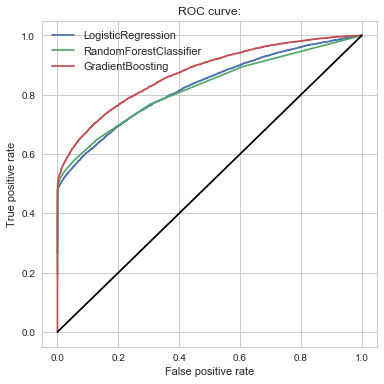

In [48]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
    'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100,
                                                   max_features = 0.3),
}
models_report, conf_matrix = compare_classifier_models(X_train, y_train, X_test, y_test, models)

In [49]:
models_report

,model,roc_auc_score,precision_score,recall_score,f1_score,matthews_corrcoef
0,LogisticRegression,0.826974,0.999766,0.472631,0.641838,0.648406
1,RandomForestClassifier,0.823088,0.950709,0.511888,0.665469,0.654566
2,GradientBoosting,0.872573,0.966414,0.521840,0.677725,0.669152


In [53]:
conf_matrix['LogisticRegression']

Predicted,0,1
True,,
0,38521,1
1,4769,4274


### Questions

1) Understanding the best borrower profile for investors
2) Look at bad vs good loan indicators--home ownership, 
4) Interst rate vs loan amount over time(year and month)
5) Loan grade vs good loan/bad loan
7) applicant pool quality vs interest rates? (increased risk premium to default prone accounts)?
8) default rate vs state
10) numer of loans issued vs type of loan issued vs default rate
11) dti (joint vs individual) vs good/bad loans
12) dti vs loan grade
13) check desc: description of why the borrower needs loan
